In [1]:
# Imports
import os
import warnings 
import sys
import importlib
from pathlib import Path

directory = Path(os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir)))
sys.path.append(str(directory))

modules_to_reload = [
    'src.marine_plan.marineplan',
    'src.marine_plan.pre_compute',
    'src.marine_plan.post_compute.clustering',
    'src.marine_plan.post_compute.substations',
    'src.marine_plan.phasing',
]

# Reload and import each module
for module_name in modules_to_reload:
    module = importlib.import_module(module_name)
    importlib.reload(module)
    globals().update({name: getattr(module, name) for name in dir(module) if not name.startswith('_')})

from src.marine_plan.marineplan import *
from src.marine_plan.pre_compute.pre_compute import *
from src.marine_plan.post_compute.clustering import *
from src.marine_plan.post_compute.substations import *
from src.marine_plan.phasing import *


warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
## Simulation environment

goals = {
    # Note here -- the unit doesn't matter, I have a conversion but just make it the

    # 'mussel_units':   {'max': 50_000, 'unit': 'turbines', 'penalty': 'exponential'},
    # 'seaweed_units':     {'min': 50_000, 'unit': 'panels', 'penalty': 'exponential'},
    # 'fpv_units':     {'min': 1_000, 'unit': 'panels', 'penalty': 'exponential'},
    # 'semisub_taut_driv_units':     {'min': 400, 'unit': 'panels', 'penalty': 'exponential'},
    # 'spar_taut_driv_units':     {'min': 400, 'unit': 'panels', 'penalty': 'exponential'},
    # 'total_food_produced':      {'max': 100_000_000, 'unit': 'kg/y', 'penalty': 'exponential'},
    # 'total_mussel_food_produced':       {'max': 50_000_000, 'unit': 'kg/y', 'penalty': 'exponential'},
    # 'total_capex':   {'max': 20_000_000_000, 'unit': '€/y', 'penalty': 'light'},
    #'total_eco_sensitivity':    {'max': 1_500, 'unit': '€/y', 'penalty': 'light'},
}

sim_env = {'env_name': 'cursed_phasing_test',
           'run_name': 'test',
           'config': ['msp'], 
           'result_folder': 'test',
           'goals': {},
           'hubs': {},
           'hubs_included': True,
           'set_cables': {},
           'iterative': True,
           'optimize_hubs': False,
           }

sim_params = {
    'energy_targets': True,
    'country': 'all', # 'all' or 2 letter country code
    'capacity_needed': 72, # When 'all' is selected, it uses the total capacity calculated from the energy targets dictionary within the class
    'coop': True, # Adjust to True to allow placements outside of EEZ
    'synergies': False, # Deprecated
    'calc_interconnectors': False, # Deprecated
    'hub_constraints': False, # Deprecated because of turbine densities -- fix this
    'eco_limit': 3, # The maximum eco sensitivity value that is acceptable
}

## Technology options - if for any reason you want to remove a technology, just set present to False
base_single_techs = {
        'monopile': {'present': True, 'metric_mods': {}},
        'jacket': {'present': True, 'metric_mods': {}},
        'fpv': {'present': False, 'metric_mods': {}},
        'semisub_cat_drag': {'present': False, 'metric_mods': {}},
        'semisub_taut_driv': {'present': False, 'metric_mods': {}},
        'semisub_taut_suc': {'present': False, 'metric_mods': {}},
        'spar_cat_drag': {'present': False, 'metric_mods': {}},
        'spar_taut_driv': {'present': False, 'metric_mods': {}},
        'spar_taut_suc': {'present': False, 'metric_mods': {}},
        'mussel': {'present': False, 'metric_mods': {}},
        'seaweed': {'present': False, 'metric_mods': {}},
  }

optimization_params = {
    'negatives': {
        # 'total_opex': 1,
        # 'total_capex': 1,
        # 'total_CO2_emission': 1.5,
        # 'total_eco_sensitivity': 9_000_000, # Ranges from ~ -2 to 3, the lower the number, the better. The only one with negative values (very good) is aquaculture
                                             # 10_000_000 is a placeholder for monetization, basically saying that 1 = 10_000_000€
    },

    'positives': {
        # 'total_energy': 1,
        # 'total_food': 1,
        # 'total_revenue': 1,
        # 'total_CO2_mitigation': 1.5,
        # 'total_CO2_net': 1,
        'total_LCOE': 1, # the lower the better -- so try to minimize this
        # 'total_eco_sensitivity': 9_000_000,
    },
    
    'direction': 'minimize',
    'solver': 'HiGH',
}


All calculations complete.
Temp folder created and filled
Time taken for _load_metrics: 0.2502889633178711 seconds
Time taken for _set_criteria_metrics: 11.0142982006073 seconds
333
Time taken for _set_energy_targets: 1.526993751525879 seconds
Optimal solution found for cursed_phasing_test: 26536.9123812003
Time taken for optimization: 4.586904048919678 seconds
Country: FR -- Capacity: 0.0 -- Requirement: 17.0
Country: BE -- Capacity: 0.0 -- Requirement: 8.0
Country: NL -- Capacity: 0.0 -- Requirement: 72.0
Country: DE -- Capacity: 1.6875 -- Requirement: 66.0
Country: DK -- Capacity: 0.0 -- Requirement: 35.0
Country: NO -- Capacity: 0.0 -- Requirement: 30.0
Country: UK -- Capacity: 3.1875 -- Requirement: 80.0
3
Time taken for _load_metrics: 0.2527611255645752 seconds
Time taken for _set_criteria_metrics: 10.886777877807617 seconds
333
Time taken for _set_energy_targets: 1.727632999420166 seconds
Optimal solution found for cursed_phasing_test: 27033.923609191235
Time taken for optimizat

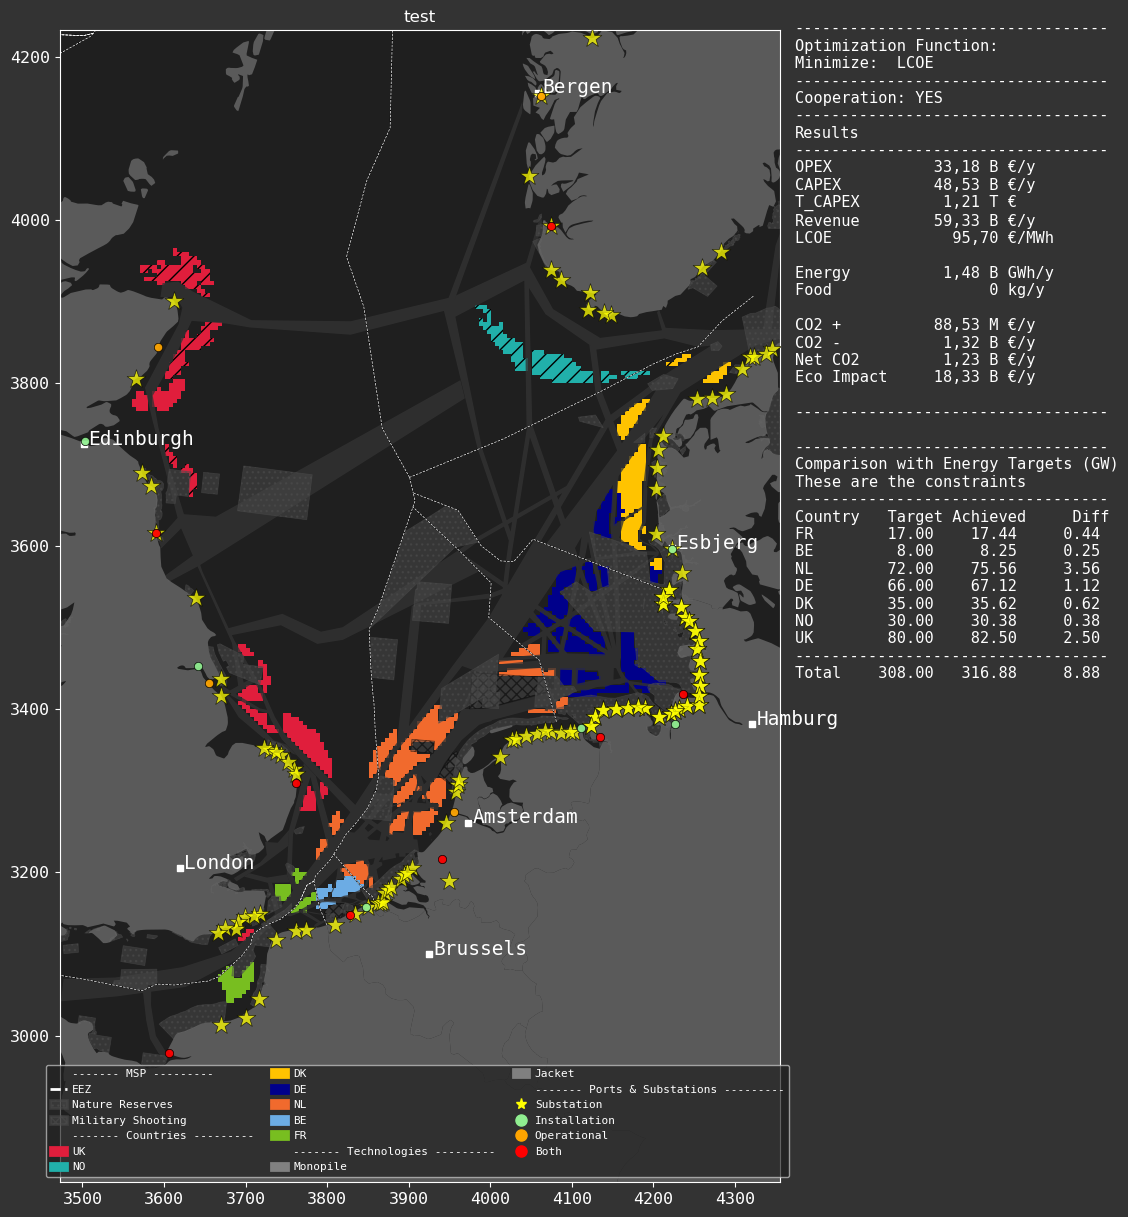

In [3]:
cursed_phasing(directory, sim_env, sim_params, base_single_techs, optimization_params, 5, update_ports=False, custom_ports=True)